In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

In [52]:
# extract data from "random_forest_data.xlsx"
data = pd.read_excel("random_forest_data.xlsx")
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.to_numpy()

# get state labels
states = data[1:, 0]

# get rows and columns corresponding to necessary data
data = data[1:, 1:]
rf_data = data[:, :]

In [53]:
# extract labels from "emissions_mitigation_rating.xlsx"
data = pd.read_excel("emissions_mitigation_rating.xlsx")
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.to_numpy()

# get state labels
labels = data[1:, 1]
labels = labels.astype(int)

In [54]:
# Create and fit random forest
random_forest = RandomForestClassifier(n_estimators = 10, criterion='entropy', max_depth = None, oob_score = True)
random_forest.fit(rf_data, labels)

print(random_forest.score(rf_data, labels))

0.9803921568627451


Text(0.5, 1.0, 'Feature Importance for Emissions Mitigation')

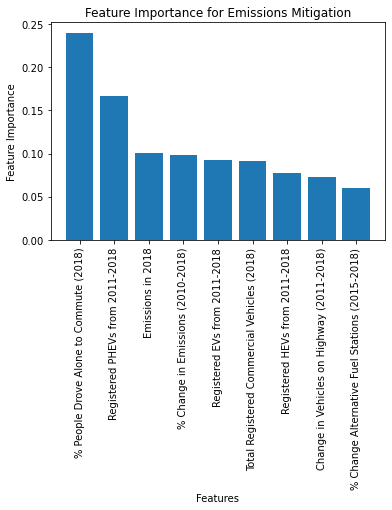

In [55]:
# Plot feature importance

# array of feature names
feature_names = np.array(['Emissions in 2018', '% Change in Emissions (2010-2018)', 
                          'Total Registered Commercial Vehicles (2018)', 
                          'Registered EVs from 2011-2018', 'Registered HEVs from 2011-2018', 
                          'Registered PHEVs from 2011-2018', 
                          '% Change Alternative Fuel Stations (2015-2018)', 
                          '% People Drove Alone to Commute (2018)',
                          'Change in Vehicles on Highway (2011-2018)'])

# get feature importance for decision tree
feature_imp = random_forest.feature_importances_

# sort feature importances
sorted_ind = np.argsort(feature_imp)

feature_imp_sorted = np.flip(feature_imp[sorted_ind])
feature_names_sorted = np.flip(feature_names[sorted_ind])

# plot bar graph
fig, ax = plt.subplots()

ax.bar(feature_names_sorted, feature_imp_sorted)

ax.set_xlabel('Features')
ax.set_xticklabels(feature_names_sorted, rotation='vertical')
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importance for Emissions Mitigation')